In [1]:
import geopandas as gpd

In [2]:
df_94 = gpd.read_file(f'../data/processed/municipality_excess_heat_1994.geojson')
df_02 = gpd.read_file(f'../data/processed/municipality_excess_heat_2002.geojson')
df_12 = gpd.read_file(f'../data/processed/municipality_excess_heat_2012.geojson')
df_22 = gpd.read_file(f'../data/processed/municipality_excess_heat_2022.geojson')

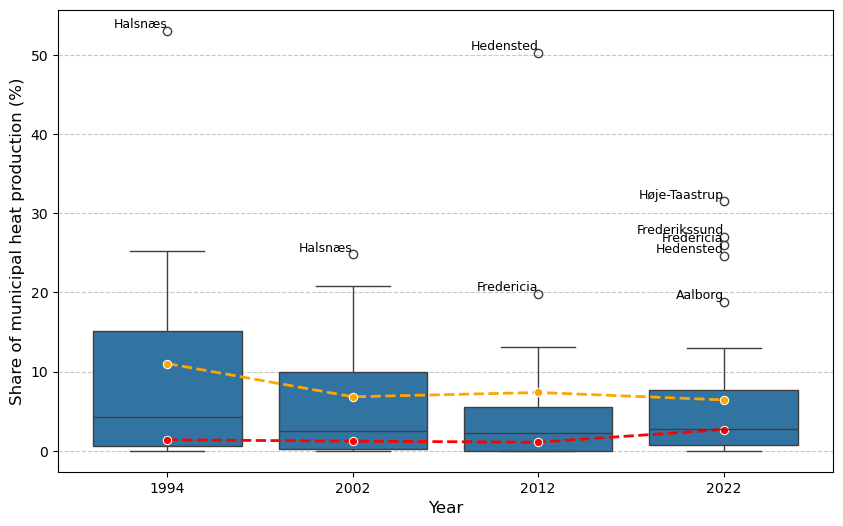

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assign year labels before concatenation
df_94["year"] = 1994
df_02["year"] = 2002
df_12["year"] = 2012
df_22["year"] = 2022

# Combine datasets
df_combined = pd.concat([df_94, df_02, df_12, df_22], ignore_index=True)
#df_combined.fillna(0, inplace=True)
# Calculate national averages
national_avg = df_combined.fillna(0).groupby("year", as_index=False)["share_of_total_heat_production_TJ"].mean()
national_avg_n = df_combined.groupby("year", as_index=False)["share_of_total_heat_production_TJ"].mean()

# Convert year to categorical for boxplot ordering
df_combined["year"] = df_combined["year"].astype(str)
national_avg["year"] = national_avg["year"].astype(str)  # Convert for proper alignment
national_avg_n["year"] = national_avg_n["year"].astype(str)
# Plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_combined, x="year", y="share_of_total_heat_production_TJ")

# Identify outliers for annotation
for year in df_combined["year"].unique():
    subset = df_combined[df_combined["year"] == year]
    q1 = subset["share_of_total_heat_production_TJ"].quantile(0.25)
    q3 = subset["share_of_total_heat_production_TJ"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = subset[(subset["share_of_total_heat_production_TJ"] < lower_bound) | 
                      (subset["share_of_total_heat_production_TJ"] > upper_bound)]
    
    # Annotate outliers
    for _, row in outliers.iterrows():
        ax.text(row["year"], row["share_of_total_heat_production_TJ"], row["municipality_name_shorted"], 
                ha='right', va='bottom', fontsize=9, color='black')
# Add national average line
sns.lineplot(data=national_avg, x="year", y="share_of_total_heat_production_TJ", 
             color="red", marker="o", linestyle="--", linewidth=2)
sns.lineplot(data=national_avg_n, x="year", y="share_of_total_heat_production_TJ", 
             color="orange", marker="o", linestyle="--", linewidth=2)


# Improve aesthetics
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Share of municipal heat production (%)", fontsize=12)
#ax.set_title("Distribution of heat production share by Year", fontsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [ ]:
national_avg

In [ ]:
national_avg_n